In [15]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.xception import (
  Xception, preprocess_input, decode_predictions)

In [73]:
# data_path = "./Resources/"
image_path = "./Resources/TrainingImages/"

training_df = pd.read_csv("./Resources/train.csv")

training_df = training_df.drop("Unnamed: 0", axis=1)

training_df["label"] = training_df["label"].astype(str)

training_df["file_name"] = training_df["file_name"].str.replace("train_data", "./Resources/TrainingImages")

#training_df["file_name"] = data_path + training_df["file_name"]

training_df.head()

,file_name,label
0,./Resources/TrainingImages/a6dcb93f596a4324913...,1
1,./Resources/TrainingImages/041be3153810433ab14...,0
2,./Resources/TrainingImages/615df26ce9494e5db2f...,1
3,./Resources/TrainingImages/8542fe161d9147be8e8...,0
4,./Resources/TrainingImages/5d81fa12bc3b4cea8c9...,1


In [55]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79950 entries, 0 to 79949
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  79950 non-null  object
 1   label      79950 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [85]:
rescaled_data = image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = rescaled_data.flow_from_dataframe(
    training_df,
    x_col="file_name",
    y_col="label",
    target_size=(255, 255),
    batch_size=32,
    class_mode="binary",
    subset="training")

test_generator = rescaled_data.flow_from_dataframe(
    training_df,
    x_col="file_name",
    y_col="label",
    target_size=(255, 255),
    batch_size=32,
    class_mode="binary",
    subset="validation")    

Found 63960 validated image filenames belonging to 2 classes.
Found 15990 validated image filenames belonging to 2 classes.


In [145]:
(train_generator[2])

(array([[[[0.        , 0.        , 0.        ],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00784314, 0.00784314, 0.00784314],
          ...,
          [0.        , 0.        , 0.01568628],
          [0.        , 0.        , 0.01568628],
          [0.        , 0.        , 0.01568628]],
 
         [[0.01176471, 0.01176471, 0.01176471],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01960784, 0.01960784, 0.01960784],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         [[0.00784314, 0.00784314, 0.00784314],
          [0.01176471, 0.01176471, 0.01176471],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314],
          [0.        , 0.        , 0.00784314]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [163]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\Users\sicke\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [165]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [167]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      14,745,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,802,114 (56.47 MB)

 Trainable params: 14,802,114 (56.47 MB)

 Non-trainable params: 0 (0.00 B)

In [171]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=1)

1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1652s 825ms/step - accuracy: 0.8740 - loss: 0.3317


In [205]:
history.history

{'accuracy': [0.8892120122909546], 'loss': [0.2905142307281494]}

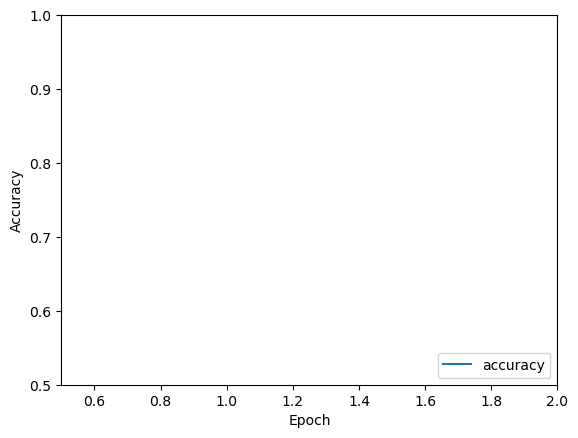

In [197]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.xlim([0.5, 2])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(train_generator)

In [185]:
print(test_acc)

0.9241713285446167


In [195]:
model.save("./model_01.h5")